#### Azure Data Lake Storage Integration with DataBricks

In [0]:
# Import necessary SparkSession module
from pyspark.sql import SparkSession

In [0]:
# Create a Spark session
spark = SparkSession.builder.appName("TaxiPrediction").getOrCreate()

In [0]:
# Set the Azure Data Lake Storage account key as a configuration parameter
# This configuration allows Spark to access data in Azure Data Lake Storage Gen1
spark.conf.set(
    "fs.azure.account.key.taxipredictionn.dfs.core.windows.net",
    "dHEeyolEN67w4kzTBEBm48V29ah5KKBirqtz5xAsGtwezbe20br3Kjg7GL6ZcPD32whXVDpnuzR2+AStPHC40A=="
)

In [0]:
# Use dbutils.fs.ls() to list the contents of the specified Azure Data Lake Storage Gen2 directory
# The directory path is specified using the ABFS (Azure Blob File System) URI scheme, "abfss://"
dbutils.fs.ls("abfss://container-bigdata@taxipredictionn.dfs.core.windows.net/")

Out[10]: [FileInfo(path='abfss://container-bigdata@taxipredictionn.dfs.core.windows.net/output.csv', name='output.csv', size=2673345514, modificationTime=1701974146000),
 FileInfo(path='abfss://container-bigdata@taxipredictionn.dfs.core.windows.net/taxi+_zone_lookup (1).csv', name='taxi+_zone_lookup (1).csv', size=12322, modificationTime=1702272235000)]

In [0]:
#set the data lake file location:
file_location="abfss://container-bigdata@taxipredictionn.dfs.core.windows.net/"

#read data to df
df=spark.read.format("csv").option("inferSchema", "true").option("header","true").option("delimiter",",").load(file_location)

#display dataframe
#display(df)

In [0]:
#set the data lake file location:
file_location2="abfss://container-bigdata@taxipredictionn.dfs.core.windows.net/taxi+_zone_lookup (1).csv"

#read data to df
df_zones=spark.read.format("csv").option("inferSchema", "true").option("header","true").option("delimiter",",").load(file_location2)

#display dataframe
#display(df_zones)

In [0]:
df.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2023-01-01 00:32:10|  2023-01-01 00:40:36|            1.0|         0.97|       1.0|                 N|         161|         141|           2|        9.3|  1.0|    0.5|       0.

In [0]:
print('Data overview')
df.printSchema()


Data overview
root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



In [0]:
# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_columns = len(df.columns)

print(num_rows)
print(num_columns)

25225202
19


In [0]:
# Check for missing values
#print('Missing values:')
#for column in df.columns:
    #missing_count = df.filter(df[column].isNull() | (df[column] == "")).count()
    #print(f"{column}: {missing_count} missing values")

In [0]:
df.summary()

Out[12]: DataFrame[summary: string, VendorID: string, tpep_pickup_datetime: string, tpep_dropoff_datetime: string, passenger_count: string, trip_distance: string, RatecodeID: string, store_and_fwd_flag: string, PULocationID: string, DOLocationID: string, payment_type: string, fare_amount: string, extra: string, mta_tax: string, tip_amount: string, tolls_amount: string, improvement_surcharge: string, total_amount: string, congestion_surcharge: string, Airport_fee: string]

###Data Cleaning

######Removing Null values

In [0]:
from pyspark.sql import functions as F

#Null value counts
null_counts = df.select([F.count(F.when(F.col(col).isNull(), col)).alias(col) for col in df.columns])

null_counts.show()


In [0]:
from pyspark.ml.feature import Imputer, StringIndexer
from pyspark.sql.functions import when

# Columns with missing values
columns_with_missing = ["passenger_count", "RatecodeID", "store_and_fwd_flag", "congestion_surcharge", "Airport_fee"]

# Encode categorical column
string_indexer = StringIndexer(inputCol="store_and_fwd_flag", outputCol="store_and_fwd_flag_indexed")
df_encoded = string_indexer.fit(df).transform(df)

# Print the schema after encoding
print("Schema after encoding:")
df_encoded.printSchema()


Schema after encoding:
root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- store_and_fwd_flag_indexed: double (nullable = false)



In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

# Coverting passenger count from string to numeric
df_encoded = df_encoded.withColumn("passenger_count", col("passenger_count").cast(IntegerType()))


In [0]:
from pyspark.ml.feature import Imputer, StringIndexer
from pyspark.sql.functions import when


# Impute missing values for numerical columns with mean
imputer_numerical = Imputer(strategy="mean", inputCols=["passenger_count", "RatecodeID", "congestion_surcharge", "Airport_fee"],
                             outputCols=["passenger_count_imputed", "RatecodeID_imputed", "congestion_surcharge_imputed", "Airport_fee_imputed"])

# Apply imputation
df_imputed = imputer_numerical.fit(df_encoded).transform(df_encoded)

# Create a new column to indicate originally missing values
for column in columns_with_missing:
    imputed_column = column + "_imputed"
    df_imputed = df_imputed.withColumn(column + "_was_missing", when(df_imputed[column].isNotNull(), 0).otherwise(1))

# Drop original columns with missing values
df_imputed = df_imputed.drop(*columns_with_missing)

# Show the updated schema
df_imputed


Out[30]: DataFrame[VendorID: string, tpep_pickup_datetime: string, tpep_dropoff_datetime: string, trip_distance: double, PULocationID: int, DOLocationID: int, payment_type: int, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, improvement_surcharge: double, total_amount: double, store_and_fwd_flag_indexed: double, passenger_count_imputed: int, RatecodeID_imputed: double, congestion_surcharge_imputed: double, Airport_fee_imputed: double, passenger_count_was_missing: int, RatecodeID_was_missing: int, store_and_fwd_flag_was_missing: int, congestion_surcharge_was_missing: int, Airport_fee_was_missing: int]

In [0]:
df_imputed.show()

+--------+--------------------+---------------------+-------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------------+-----------------------+------------------+----------------------------+-------------------+---------------------------+----------------------+------------------------------+--------------------------------+-----------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|trip_distance|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|store_and_fwd_flag_indexed|passenger_count_imputed|RatecodeID_imputed|congestion_surcharge_imputed|Airport_fee_imputed|passenger_count_was_missing|RatecodeID_was_missing|store_and_fwd_flag_was_missing|congestion_surcharge_was_missing|Airport_fee_was_missing|
+--------+--------------------+---------------------+-------------+------------+------------+-------

In [0]:
columns_to_drop = [
    "passenger_count_was_missing",
    "RatecodeID_was_missing",
    "store_and_fwd_flag_was_missing",
    "congestion_surcharge_was_missing",
    "Airport_fee_was_missing"
]

df_imputed = df_imputed.drop(*columns_to_drop)



######Filtering DataFrame with passenger count=0

In [0]:
from pyspark.sql.functions import col

# Filter the DataFrame for passenger_count_imputed equal to 0
zero_passenger_count_df = df_imputed.filter(col("passenger_count_imputed") == 0)

# Count the occurrences
count_of_zero_passenger_count = zero_passenger_count_df.count()

# Display the count
print(f"Count of records with passenger_count_imputed equal to 0: {count_of_zero_passenger_count}")


Count of records with passenger_count_imputed equal to 0: 413342


In [0]:
# Drop rows where passenger_count_imputed is equal to 0
df_filtered = df_imputed.filter(col("passenger_count_imputed") != 0)

# Display the updated DataFrame
df_filtered.show(truncate=False)


+--------+--------------------+---------------------+-------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------------+-----------------------+------------------+----------------------------+-------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|trip_distance|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|store_and_fwd_flag_indexed|passenger_count_imputed|RatecodeID_imputed|congestion_surcharge_imputed|Airport_fee_imputed|
+--------+--------------------+---------------------+-------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------------+-----------------------+------------------+----------------------------+-------------------+
|2       |2023-01-01 00:32:10 |2023-01-01 00:40:36  |0.97         |

#### Converting pickup timestamp to day of the week and hour

In [0]:
# Display a sample of the "tpep_pickup_datetime" column
df_filtered.select("tpep_pickup_datetime").show(10, truncate=False)


+--------------------+
|tpep_pickup_datetime|
+--------------------+
|2023-01-01 00:32:10 |
|2023-01-01 00:55:08 |
|2023-01-01 00:25:04 |
|2023-01-01 00:10:29 |
|2023-01-01 00:50:34 |
|2023-01-01 00:09:22 |
|2023-01-01 00:27:12 |
|2023-01-01 00:21:44 |
|2023-01-01 00:39:42 |
|2023-01-01 00:53:01 |
+--------------------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import hour, dayofweek, from_unixtime, col, when

# Extract hour from 'tpep_pickup_datetime'
df_filtered = df_filtered.withColumn('pickup_day_of_week', dayofweek(df_filtered['tpep_pickup_datetime']))

# Convert day of week to string representation
day_of_week_mapping = {
    1: 'Sun',
    2: 'Mon',
    3: 'Tue',
    4: 'Wed',
    5: 'Thu',
    6: 'Fri',
    7: 'Sat'
}

# Replace pickup_day_of_week using when and otherwise
for day_num, day_str in day_of_week_mapping.items():
    df_filtered = df_filtered.withColumn('pickup_day_of_week', when(col('pickup_day_of_week') == day_num, day_str).otherwise(col('pickup_day_of_week')))

# Show the modified DataFrame
df_filtered.select("pickup_day_of_week").show()



+------------------+
|pickup_day_of_week|
+------------------+
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
|               Sun|
+------------------+
only showing top 20 rows



In [0]:
df_filtered.select("pickup_day_of_week").distinct().show(truncate=False)

+------------------+
|pickup_day_of_week|
+------------------+
|Sun               |
|Mon               |
|Thu               |
|Sat               |
|Wed               |
|Tue               |
|Fri               |
|null              |
+------------------+



In [0]:
from pyspark.sql.functions import col, date_format, hour, when, concat_ws

# Extract hour from 'tpep_pickup_datetime'
df_filtered = df_filtered.withColumn('pickup_hour', hour(df_filtered['tpep_pickup_datetime']))

# Map the hour to a 12-hour format with AM/PM designation
df_filtered = df_filtered.withColumn('pickup_hour', 
                                     when(col('pickup_hour') == 0, 12).otherwise(col('pickup_hour')))
df_filtered = df_filtered.withColumn('pickup_period', 
                                     when(col('pickup_hour') < 12, 'AM').otherwise('PM'))
df_filtered = df_filtered.withColumn('pickup_hour_12h', 
                                     when(col('pickup_hour') == 12, 12).otherwise(col('pickup_hour') % 12))

# Concatenate hour and period into a single column
df_filtered = df_filtered.withColumn('pickup_hour', 
                                     concat_ws(' ', col('pickup_hour_12h'), col('pickup_period')))

# Show the modified DataFrame
df_filtered.select("pickup_hour").distinct().show(truncate=False)


+-----------+
|pickup_hour|
+-----------+
|8 PM       |
|7 AM       |
|7 PM       |
|6 AM       |
|1 PM       |
|11 AM      |
|10 AM      |
|4 AM       |
|11 PM      |
|10 PM      |
|2 AM       |
|3 AM       |
|9 PM       |
|12 PM      |
|5 PM       |
|9 AM       |
|8 AM       |
|3 PM       |
|2 PM       |
|1 AM       |
+-----------+
only showing top 20 rows



In [0]:
# Get unique values for pickup_hour and pickup_day_of_week
unique_pickup_hour = df_filtered.select("pickup_hour").distinct().collect()
unique_pickup_day = df_filtered.select("pickup_day_of_week").distinct().collect()

In [0]:
# Print the unique values
print("Unique Pickup Hours:")
for row in unique_pickup_hour:
    print(row.pickup_hour)

print("\nUnique Pickup Days:")
for row in unique_pickup_day:
    print(row.pickup_day_of_week)


Unique Pickup Hours:
6 PM
8 PM
7 AM
7 PM
6 AM
1 PM
11 AM
10 AM
4 AM
11 PM
10 PM
2 AM
3 AM
9 PM
12 PM
5 PM
9 AM
8 AM
3 PM
2 PM
1 AM
5 AM
4 PM
PM

Unique Pickup Days:
Sun
Mon
Thu
Sat
Wed
Tue
Fri
None


#### Converting drop off timestamp

In [0]:
from pyspark.sql.functions import col, date_format, hour, when, concat_ws

# Extract hour from 'tpep_dropoff_datetime'
df_filtered = df_filtered.withColumn('dropoff_hour', hour(df_filtered['tpep_dropoff_datetime']))

# Map the hour to a 12-hour format with AM/PM designation
df_filtered = df_filtered.withColumn('dropoff_hour', 
                                     when(col('dropoff_hour') == 0, 12).otherwise(col('dropoff_hour')))
df_filtered = df_filtered.withColumn('dropoff_period', 
                                     when(col('dropoff_hour') < 12, 'AM').otherwise('PM'))
df_filtered = df_filtered.withColumn('dropoff_hour_12h', 
                                     when(col('dropoff_hour') == 12, 12).otherwise(col('dropoff_hour') % 12))

# Concatenate hour and period into a single column
df_filtered = df_filtered.withColumn('dropoff_hour', 
                                     concat_ws(' ', col('dropoff_hour_12h'), col('dropoff_period')))

# Show the modified DataFrame
df_filtered.select("dropoff_hour").distinct().show(truncate=False)


+------------+
|dropoff_hour|
+------------+
|8 PM        |
|7 AM        |
|7 PM        |
|6 AM        |
|11 AM       |
|10 AM       |
|4 AM        |
|11 PM       |
|10 PM       |
|2 AM        |
|3 AM        |
|9 PM        |
|12 PM       |
|5 PM        |
|9 AM        |
|8 AM        |
|3 PM        |
|2 PM        |
|1 AM        |
|5 AM        |
+------------+
only showing top 20 rows



In [0]:
# Extract hour from tpep_dropoff_datetime
df_filtered = df_filtered.withColumn('dropoff_day_of_week', dayofweek(df_filtered['tpep_dropoff_datetime']))

# Convert day of week to string representation
day_of_week_mapping = {
    1: 'Sun',
    2: 'Mon',
    3: 'Tue',
    4: 'Wed',
    5: 'Thu',
    6: 'Fri',
    7: 'Sat'
}

# Replace dropoff_day_of_week using when and otherwise
for day_num, day_str in day_of_week_mapping.items():
    df_filtered = df_filtered.withColumn('dropoff_day_of_week', when(col('dropoff_day_of_week') == day_num, day_str).otherwise(col('dropoff_day_of_week')))

# Show the modified DataFrame
df_filtered.select("dropoff_day_of_week").show()

+-------------------+
|dropoff_day_of_week|
+-------------------+
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
|                Sun|
+-------------------+
only showing top 20 rows



In [0]:
# Get unique values for dropoff_hour and dropoff_day_of_week
unique_dropoff_hour = df_filtered.select("dropoff_hour").distinct().collect()
unique_dropoff_day = df_filtered.select("dropoff_day_of_week").distinct().collect()

# Print the unique values
print("Unique dropoff Hours:")
for row in unique_dropoff_hour:
    print(row.dropoff_hour)

print("\nUnique dropoff Days:")
for row in unique_dropoff_day:
    print(row.dropoff_day_of_week)

Unique dropoff Hours:
6 PM
8 PM
7 AM
7 PM
6 AM
1 PM
11 AM
10 AM
4 AM
11 PM
10 PM
2 AM
3 AM
9 PM
12 PM
5 PM
9 AM
8 AM
3 PM
2 PM
1 AM
5 AM
4 PM
PM

Unique dropoff Days:
Sun
Mon
Thu
Sat
Wed
Tue
Fri
None


In [0]:
columns_to_drop = [
    "dropoff_period",
    "dropoff_hour_12h",
    "pickup_period",
    "pickup_hour_12h"
]

df_filtered = df_filtered.drop(*columns_to_drop)

#### Categorizing pick up time of the day to Morning, Afternoon, Evening and Night

In [0]:
from pyspark.sql.functions import hour, dayofweek, expr

df_filtered = df_filtered.withColumn('pickup_day_of_week', dayofweek('tpep_pickup_datetime'))

#  Create a feature for the time of day
df_filtered = df_filtered.withColumn('pickup_time_of_day', 
                                     when((hour('tpep_pickup_datetime') >= 5) & (hour('tpep_pickup_datetime') < 12), 'morning')
                                     .when((hour('tpep_pickup_datetime') >= 12) & (hour('tpep_pickup_datetime') < 17), 'afternoon')
                                     .when((hour('tpep_pickup_datetime') >= 17) & (hour('tpep_pickup_datetime') < 22), 'evening')
                                     .otherwise('night'))


#### Making sure trip_distance and fare_amount are in positive

In [0]:
# Make trip_distance and fare_amount positive
df_filtered = df_filtered.withColumn("trip_distance", col("trip_distance").cast("double").cast("int").cast("double")) \
       .withColumn("fare_amount", col("fare_amount").cast("double").cast("int").cast("double"))

# Remove rows where trip_distance or fare_amount is zero
df_filtered = df_filtered.filter((col("trip_distance") > 0) & (col("fare_amount") > 0))

##### Creating a Feature Fare per mile

In [0]:
# Create an interaction feature: fare per mile
df_filtered = df_filtered.withColumn("fare_per_mile", col("fare_amount") / col("trip_distance"))


In [0]:
df_filtered.select("fare_per_mile").show(10, truncate=False)

+-----------------+
|fare_per_mile    |
+-----------------+
|7.0              |
|7.0              |
|11.0             |
|12.0             |
|12.0             |
|4.090909090909091|
|8.5              |
|4.666666666666667|
|11.0             |
|4.714285714285714|
+-----------------+
only showing top 10 rows



#### Calculating trip duration

In [0]:
from pyspark.sql.functions import col

# Assuming df_filtered is your DataFrame
df_filtered = df_filtered.withColumn('tpep_pickup_datetime', col('tpep_pickup_datetime').cast('timestamp'))
df_filtered = df_filtered.withColumn('tpep_dropoff_datetime', col('tpep_dropoff_datetime').cast('timestamp'))

# Calculate trip duration in seconds
df_filtered = df_filtered.withColumn('trip_duration_seconds', 
                                     (col('tpep_dropoff_datetime').cast('long') - col('tpep_pickup_datetime').cast('long')))

# Convert trip duration to minutes
df_filtered = df_filtered.withColumn('trip_duration_minutes', col('trip_duration_seconds') / 60)

# Drop intermediate columns if needed
df_filtered = df_filtered.drop('trip_duration_seconds')

# Show the DataFrame with the new 'trip_duration_minutes' column
df_filtered.select('trip_duration_minutes').show(truncate=False)


+---------------------+
|trip_duration_minutes|
+---------------------+
|6.316666666666666    |
|12.75                |
|10.833333333333334   |
|12.3                 |
|10.45                |
|22.733333333333334   |
|14.933333333333334   |
|10.9                 |
|8.733333333333333    |
|33.68333333333333    |
|29.683333333333334   |
|19.9                 |
|15.366666666666667   |
|9.1                  |
|22.466666666666665   |
|14.816666666666666   |
|6.0                  |
|14.3                 |
|6.55                 |
|30.5                 |
+---------------------+
only showing top 20 rows



In [0]:
df_filtered.printSchema()

root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- store_and_fwd_flag_indexed: double (nullable = false)
 |-- passenger_count_imputed: integer (nullable = true)
 |-- RatecodeID_imputed: double (nullable = true)
 |-- congestion_surcharge_imputed: double (nullable = true)
 |-- Airport_fee_imputed: double (nullable = true)
 |-- pickup_day_of_week: integer (nullable = true)
 |-- pickup_hour: string (nullable 

####Exploratory Data Analysis(EDA)

In [0]:
# Identify popular pickup and dropoff locations
popular_pickup_locations = df_filtered.groupBy('PULocationID').count().orderBy('count', ascending=False).first()
popular_dropoff_locations = df_filtered.groupBy('DOLocationID').count().orderBy('count', ascending=False).first()

print('Most Popular Pickup Location:')
print(popular_pickup_locations)

print('\nMost Popular Dropoff Location:')
print(popular_dropoff_locations)


Most Popular Pickup Location:
Row(PULocationID=132, count=1264679)

Most Popular Dropoff Location:
Row(DOLocationID=236, count=770610)


Most Popular Pickup Location : "LocationID": 132, "Borough":"Queens", "Zone":"JFK Airport", "service_zone":"Airports"


Most Popular Dropoff Location : "LocationID": 236, "Borough":"Manhattan", "Zone":"Upper East Side North", "service_zone":"Yellow Zone"

In [0]:
# Calculate average trip distance and fare amount by passenger count
avg_distance_by_passenger_count = df_filtered.groupBy('passenger_count_imputed').avg('trip_distance')
avg_fare_by_passenger_count = df_filtered.groupBy('passenger_count_imputed').avg('fare_amount')

# Display results
print('Average Trip Distance by Passenger Count:')
avg_distance_by_passenger_count.show()

print('\nAverage Fare Amount by Passenger Count:')
avg_fare_by_passenger_count.show()

Average Trip Distance by Passenger Count:
+-----------------------+------------------+
|passenger_count_imputed|avg(trip_distance)|
+-----------------------+------------------+
|                      1| 4.847173957763346|
|                      6| 3.649430165243299|
|                      3| 4.362169149196596|
|                      5|3.6481691938848586|
|                      4| 4.736565054383752|
|                      8|14.380952380952381|
|                      7| 10.31578947368421|
|                      2| 4.551828587685363|
|                      9|14.615384615384615|
+-----------------------+------------------+


Average Fare Amount by Passenger Count:
+-----------------------+------------------+
|passenger_count_imputed|  avg(fare_amount)|
+-----------------------+------------------+
|                      1| 21.52408213384066|
|                      6|21.582238247706904|
|                      3| 24.80665454320463|
|                      5|21.391474919824393|
|               

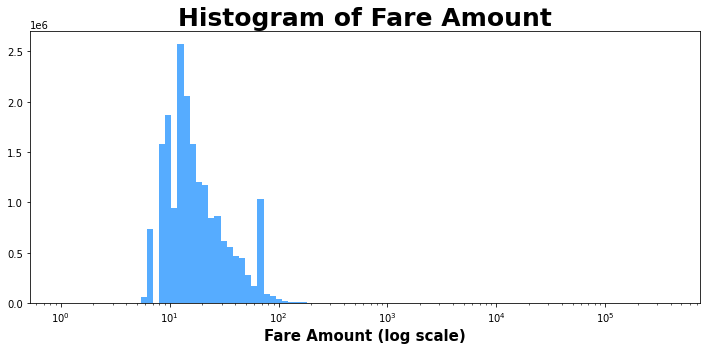

In [0]:
# Visualize the fare amount with a different binning strategy
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

# Use logarithmic scale for better visibility
log_bins = np.logspace(np.log10(1), np.log10(df_filtered.agg({"fare_amount": "max"}).collect()[0][0]), 100)

plt.hist(df_filtered.select('fare_amount').rdd.flatMap(lambda x: x).collect(), bins=log_bins, facecolor="dodgerblue", alpha=0.75)
plt.xscale('log')
plt.xlabel("Fare Amount (log scale)", fontsize=15, fontweight='bold')
plt.title("Histogram of Fare Amount", fontsize=25, fontweight='bold')
plt.show()


In [0]:
df_filtered.select("pickup_day_of_week").show(10, truncate=False)

+------------------+
|pickup_day_of_week|
+------------------+
|1                 |
|1                 |
|1                 |
|1                 |
|1                 |
|1                 |
|1                 |
|1                 |
|1                 |
|1                 |
+------------------+
only showing top 10 rows



In [0]:
# Find the highest fare amount
highest_fare = df_filtered.agg({"fare_amount": "max"}).collect()[0]["max(fare_amount)"]

# Find the lowest fare amount
lowest_fare = df_filtered.agg({"fare_amount": "min"}).collect()[0]["min(fare_amount)"]

print(f'Highest Fare Amount: {highest_fare}')
print(f'Lowest Fare Amount: {lowest_fare}')


Highest Fare Amount: 386983.0
Lowest Fare Amount: 1.0


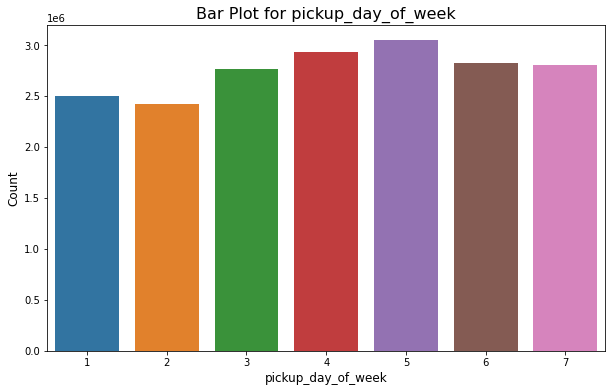

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

column_name = 'pickup_day_of_week'

# Convert PySpark DataFrame to Pandas DataFrame
df_pd = df_filtered.groupBy(column_name).count().toPandas()

# Bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=column_name, y='count', data=df_pd)
plt.title(f'Bar Plot for {column_name}', fontsize=16)

plt.xlabel(column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()



#### Thursday has most number of  Taxi pickups, followed by Wednesday

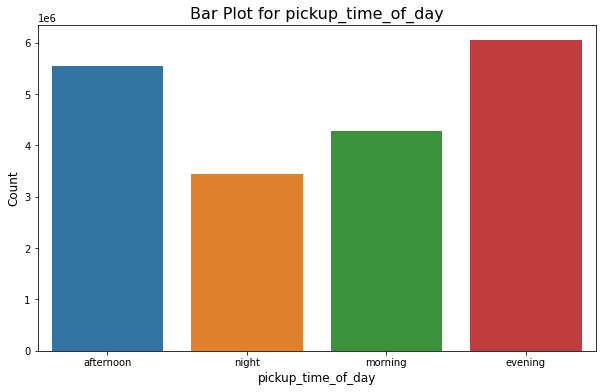

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

column_name = 'pickup_time_of_day'

# Convert PySpark DataFrame to Pandas DataFrame
df_pd = df_filtered.groupBy(column_name).count().toPandas()

# Bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=column_name, y='count', data=df_pd)
plt.title(f'Bar Plot for {column_name}', fontsize=16)
plt.xlabel(column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### Most number of Taxi pickups happened in Evening.

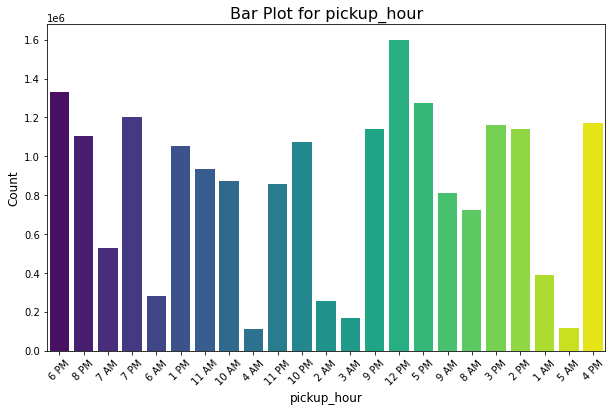

In [0]:
column_name = 'pickup_hour'

# Convert PySpark DataFrame to Pandas DataFrame
df_pd = df_filtered.groupBy(column_name).count().toPandas()

# Bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=column_name, y='count', data=df_pd, palette="viridis", capsize=0.2, ci=None, errwidth=1.0, linewidth=2, saturation=8.0)
plt.title(f'Bar Plot for {column_name}', fontsize=16)
plt.xlabel(column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set x-axis limits
plt.xlim(left=-0.5, right=len(df_pd) - 0.5) 
plt.xticks(rotation=45)
plt.show()


#### Highest Taxi Pickups are at 12 PM, followed by 6 PM

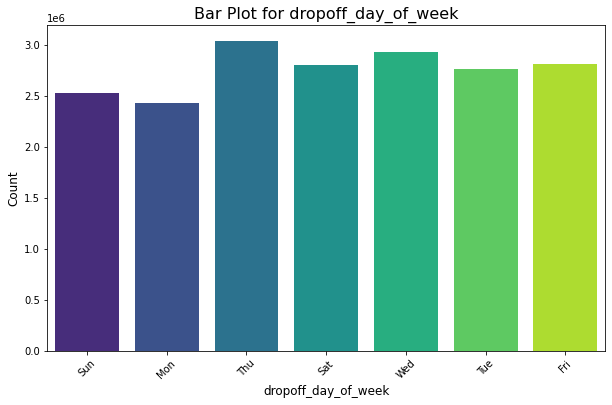

In [0]:
column_name = 'dropoff_day_of_week'

# Convert PySpark DataFrame to Pandas DataFrame
df_pd = df_filtered.groupBy(column_name).count().toPandas()

# Bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=column_name, y='count', data=df_pd, palette="viridis", capsize=0.2, ci=None, errwidth=1.0, linewidth=2, saturation=8.0)
plt.title(f'Bar Plot for {column_name}', fontsize=16)
plt.xlabel(column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set x-axis limits
plt.xlim(left=-0.5, right=len(df_pd) - 0.5) 
plt.xticks(rotation=45)
plt.show()

#### Taxi DropOffs are also high on Thursday, followed by Wednesday

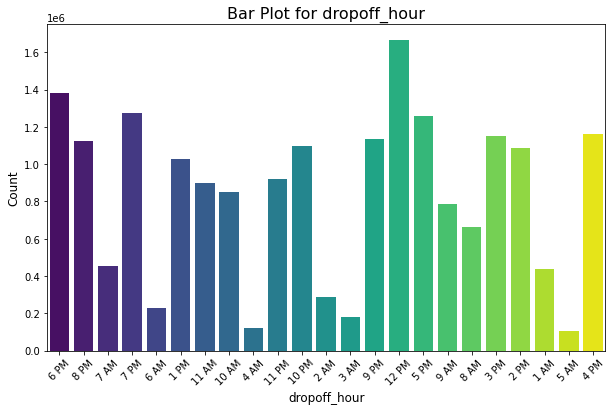

In [0]:
column_name = 'dropoff_hour'

# Convert PySpark DataFrame to Pandas DataFrame
df_pd = df_filtered.groupBy(column_name).count().toPandas()

# Bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=column_name, y='count', data=df_pd, palette="viridis", capsize=0.2, ci=None, errwidth=1.0, linewidth=2, saturation=8.0)
plt.title(f'Bar Plot for {column_name}', fontsize=16)
plt.xlabel(column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set x-axis limits
plt.xlim(left=-0.5, right=len(df_pd) - 0.5) 
plt.xticks(rotation=45)
plt.show()

#### DropOffs are also more at 12 PM,followed by 6 PM

In [0]:
column_name = 'fare_amount'

# Define the percentiles for filtering
lower_percentile = 0.18
upper_percentile = 0.985

# Calculate the lower and upper bounds based on percentiles
lower_bound = filtered_df.approxQuantile(column_name, [lower_percentile], 0.01)[0]
upper_bound = filtered_df.approxQuantile(column_name, [upper_percentile], 0.01)[0]

# Filter the DataFrame to include only values within the specified range
filtered_df = filtered_df.filter((col(column_name) >= lower_bound) & (col(column_name) <= upper_bound))

# Extract the range after filtering
column_range = filtered_df.agg({column_name: "min"}).collect()[0][0], filtered_df.agg({column_name: "max"}).collect()[0][0]

#print(f"Range of values in '{column_name}' after filtering: {column_range}")



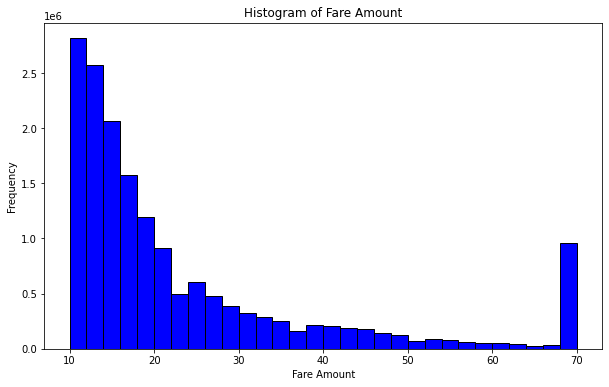

In [0]:

column_name = 'fare_amount'

# Extract the 'fare_amount' column as a list
fare_amount_data = filtered_df.select(column_name).rdd.flatMap(lambda x: x).collect()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(fare_amount_data, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

#### The concentration of lesser fare amount is high.

In [0]:
# Specify the column for which you want to find the range
column_name = 'trip_distance'

# Define the percentiles for filtering (e.g., exclude bottom 5% and top 5%)
lower_percentile = 0.20
upper_percentile = 0.98888

# Calculate the lower and upper bounds based on percentiles
lower_bound = df_filtered.approxQuantile(column_name, [lower_percentile], 0.01)[0]
upper_bound = df_filtered.approxQuantile(column_name, [upper_percentile], 0.01)[0]

# Filter the DataFrame to include only values within the specified range
filtered_df = df_filtered.filter((col(column_name) >= lower_bound) & (col(column_name) <= upper_bound))

# Extract the range after filtering
column_range = filtered_df.agg({column_name: "min"}).collect()[0][0], filtered_df.agg({column_name: "max"}).collect()[0][0]

print(f"Range of values in '{column_name}' after filtering: {column_range}")

Range of values in 'trip_distance' after filtering: (1.0, 20.0)


/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


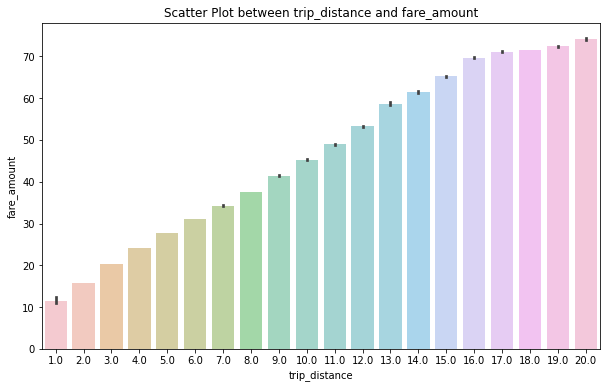

In [0]:
# Specify the columns for the scatter plot
x_column = 'trip_distance'
y_column = 'fare_amount'

# Extract the data as Pandas DataFrame (for small datasets) or use sampling for larger datasets
sampled_data = filtered_df.select([x_column, y_column]).sample(False, 0.1).toPandas()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.barplot(sampled_data[x_column], sampled_data[y_column], alpha=0.5)
plt.title(f'Scatter Plot between {x_column} and {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

#### There is a fare relation between trip distance and fare amount. Fare amount goes up as trip distance increases.

/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


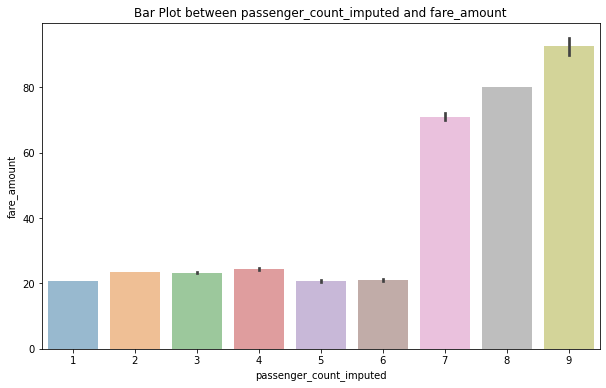

In [0]:
x_column = 'passenger_count_imputed'
y_column = 'fare_amount'

# Extract the data as Pandas DataFrame (for small datasets) or use sampling for larger datasets
sampled_data = filtered_df.select([x_column, y_column]).sample(False, 0.1).toPandas()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.barplot(sampled_data[x_column], sampled_data[y_column], alpha=0.5)
plt.title(f'Bar Plot between {x_column} and {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

#### There is a gradual increase of fare amount from 6 to 7 passengers.

In [0]:
from pyspark.sql.functions import when

filtered_df = filtered_df.withColumn('payment_type_mapped', 
                                     when(col('payment_type') == 0, 'Credit card')
                                     .when(col('payment_type') == 1, 'Cash')
                                     .when(col('payment_type') == 2, 'Debit card')
                                     .when(col('payment_type') == 3, 'Mobile payment')
                                     .when(col('payment_type') == 4, 'Unknown')
                                     .otherwise('Unknown'))




/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


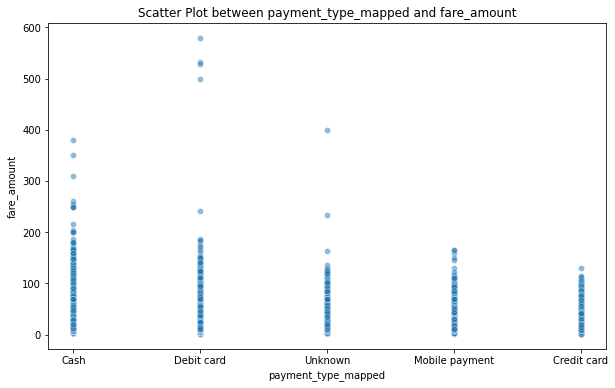

In [0]:
# Specify the columns for the scatter plot
x_column = 'payment_type_mapped'
y_column = 'fare_amount'

# Extract the data as Pandas DataFrame (for small datasets) or use sampling for larger datasets
sampled_data = filtered_df.select([x_column, y_column]).sample(False, 0.1).toPandas()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(sampled_data[x_column], sampled_data[y_column], alpha=0.5)
plt.title(f'Scatter Plot between {x_column} and {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

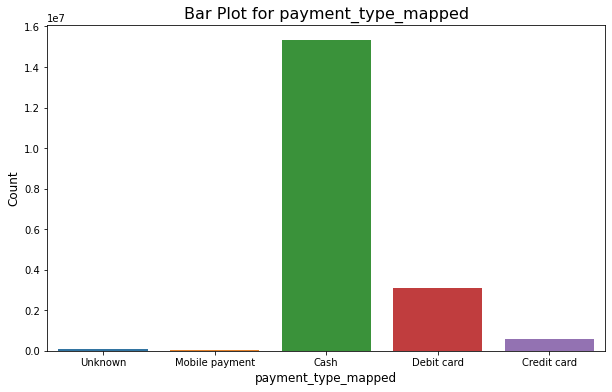

In [0]:
column_name = 'payment_type_mapped'

# Convert PySpark DataFrame to Pandas DataFrame
df_pd = filtered_df.groupBy(column_name).count().toPandas()

# Bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=column_name, y='count', data=df_pd)
plt.title(f'Bar Plot for {column_name}', fontsize=16)
plt.xlabel(column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### There are more number of Cash payments

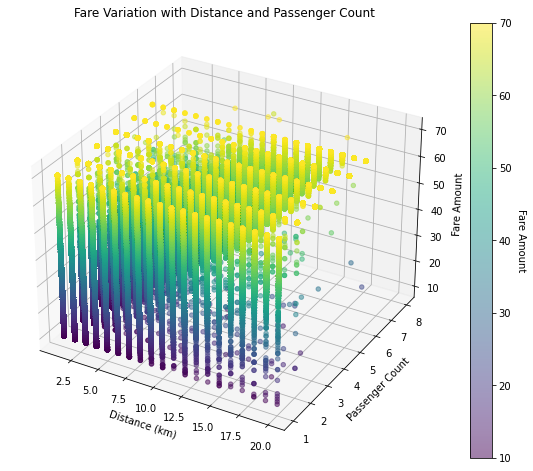

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns for the scatter plot
x_column = 'trip_distance'
y_column = 'passenger_count_imputed'
z_column = 'fare_amount'

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
scatter = ax.scatter(filtered_df.select(x_column).toPandas(), filtered_df.select(y_column).toPandas(), filtered_df.select(z_column).toPandas(), c=filtered_df.select(z_column).toPandas(), cmap='viridis', alpha=0.5)

# Set labels and title
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Passenger Count')
ax.set_zlabel('Fare Amount')
ax.set_title('Fare Variation with Distance and Passenger Count')
 
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Fare Amount', rotation=270, labelpad=15)

# Display the plot
plt.show()


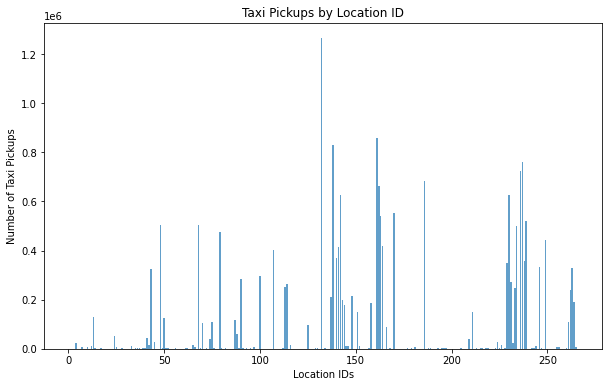

In [0]:
import matplotlib.pyplot as plt

# Check if the PULocationID column has non-null values
if df_filtered.filter(df_filtered['PULocationID'].isNotNull()).count() > 0:
    # Group by PULocationID and count the occurrences
    pickup_counts = df_filtered.groupBy("PULocationID").count().orderBy("count", ascending=False)

    # Extracting location IDs and their respective pickup counts
    location_ids = [int(row["PULocationID"]) for row in pickup_counts.collect()]
    pickup_freq = [row["count"] for row in pickup_counts.collect()]

    # Check if there are results to plot
    if location_ids:
        # Plotting the bar chart
        plt.figure(figsize=(10, 6))
        plt.bar(location_ids, pickup_freq, alpha=0.7)
        plt.xlabel('Location IDs')
        plt.ylabel('Number of Taxi Pickups')
        plt.title('Taxi Pickups by Location ID')
        plt.show()
    else:
        print("No valid results to plot.")
else:
    print("PULocationID column has null values.")



In [0]:
# Check if the PULocationID column has non-null values
if df_filtered.filter(df_filtered['DOLocationID'].isNotNull()).count() > 0:
    # Group by PULocationID and count the occurrences
    dropoff_counts = df_filtered.groupBy("DOLocationID").count().orderBy("count", ascending=False)

    # Extracting the top N location IDs and their respective dropoff counts
    top_n = 10
    top_location_ids = [int(row["DOLocationID"]) for row in dropoff_counts.limit(top_n).collect()]
    dropoff_freq = [row["count"] for row in dropoff_counts.limit(top_n).collect()]

    # Check if there are results to print
    if top_location_ids:
        # Print the top N location IDs and pickup counts
        for location_id, count in zip(top_location_ids, dropoff_freq):
            print(f"Location ID: {location_id}, Dropoff Count: {count}")
    else:
        print("No valid results to print.")
else:
    print("PULocationID column has null values.")


Location ID: 236, Dropoff Count: 770610
Location ID: 161, Dropoff Count: 671995
Location ID: 237, Dropoff Count: 656052
Location ID: 230, Dropoff Count: 542469
Location ID: 239, Dropoff Count: 534384
Location ID: 170, Dropoff Count: 525813
Location ID: 142, Dropoff Count: 521352
Location ID: 162, Dropoff Count: 506098
Location ID: 68, Dropoff Count: 481522
Location ID: 141, Dropoff Count: 462462


In [0]:
# Check if the PULocationID column has non-null values
if df_filtered.filter(df_filtered['PULocationID'].isNotNull()).count() > 0:
    # Group by PULocationID and count the occurrences
    pickup_counts = df_filtered.groupBy("PULocationID").count().orderBy("count", ascending=False)

    # Extracting the top N location IDs and their respective pickup counts
    top_n = 10
    top_location_ids = [int(row["PULocationID"]) for row in pickup_counts.limit(top_n).collect()]
    pickup_freq = [row["count"] for row in pickup_counts.limit(top_n).collect()]

    # Check if there are results to print
    if top_location_ids:
        # Print the top N location IDs and pickup counts
        for location_id, count in zip(top_location_ids, pickup_freq):
            print(f"Location ID: {location_id}, Pickup Count: {count}")
    else:
        print("No valid results to print.")
else:
    print("PULocationID column has null values.")


Location ID: 132, Pickup Count: 1264679
Location ID: 161, Pickup Count: 856686
Location ID: 138, Pickup Count: 831300
Location ID: 237, Pickup Count: 759992
Location ID: 236, Pickup Count: 722966
Location ID: 186, Pickup Count: 682104
Location ID: 162, Pickup Count: 663844
Location ID: 142, Pickup Count: 625949
Location ID: 230, Pickup Count: 625541
Location ID: 170, Pickup Count: 552688


In [0]:

from pyspark.sql.functions import col

# A df_locations_info contains columns 'LocationID' and 'Zone'
# Join the trip DataFrame with the location information DataFrame
df_with_zones = df_filtered.join(df_zones, df_filtered.PULocationID == df_zones.LocationID)

# Group by the 'Zone' column and count the number of trips
trips_by_zone = df_with_zones.groupBy("Zone").count().orderBy("count", ascending=False)

# Show the result
trips_by_zone.show(truncate=False)

+----------------------------+-------+
|Zone                        |count  |
+----------------------------+-------+
|JFK Airport                 |1264679|
|Midtown Center              |856686 |
|LaGuardia Airport           |831300 |
|Upper East Side South       |759992 |
|Upper East Side North       |722966 |
|Penn Station/Madison Sq West|682104 |
|Midtown East                |663844 |
|Lincoln Square East         |625949 |
|Times Sq/Theatre District   |625541 |
|Murray Hill                 |552688 |
|Midtown North               |541276 |
|Upper West Side South       |521158 |
|East Chelsea                |505919 |
|Clinton East                |502600 |
|Union Sq                    |500695 |
|East Village                |474660 |
|West Village                |441664 |
|Midtown South               |418146 |
|Lenox Hill West             |412623 |
|Gramercy                    |402055 |
+----------------------------+-------+
only showing top 20 rows



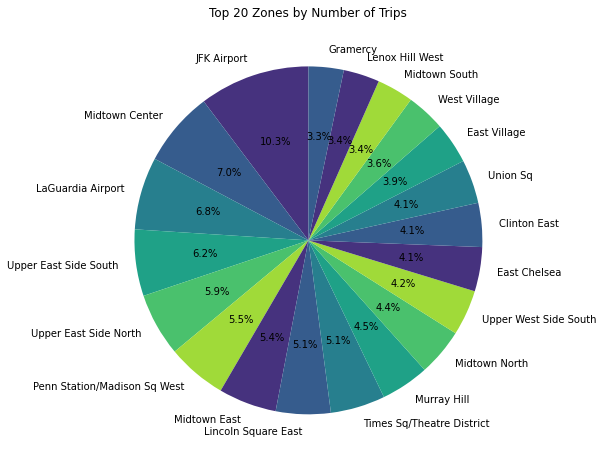

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to Pandas DataFrame
trips_by_zone_pd = trips_by_zone.toPandas()

# Sort the DataFrame by count in descending order and select the top 20 rows
top_20_zones = trips_by_zone_pd.sort_values(by='count', ascending=False).head(20)

# Create a pie plot for the top 20 zones
plt.figure(figsize=(12, 8))
plt.pie(top_20_zones['count'], labels=top_20_zones['Zone'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Top 20 Zones by Number of Trips')
plt.show()

In [0]:
import plotly.graph_objects as go

# Convert the Spark DataFrame to Pandas DataFrame
trips_by_zone_pd = trips_by_zone.toPandas()

# Sort the DataFrame by count in descending order
trips_by_zone_pd = trips_by_zone_pd.sort_values(by='count', ascending=False)

# Create the tree-map
fig = go.Figure(go.Treemap(
    labels=trips_by_zone_pd['Zone'],
    parents=[''] * len(trips_by_zone_pd),
    values=trips_by_zone_pd['count'],
    texttemplate="%{label}<br>%{value}",
    textposition="middle center",
    branchvalues="total",
))

# Update the layout
fig.update_layout(
    title='Tree-Map of Number of Trips by Zone',
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the tree-map
fig.show()

#### Machine Learning

### Regression Model

In [0]:
 from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
df_filtered.printSchema()

root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- store_and_fwd_flag_indexed: double (nullable = false)
 |-- passenger_count_imputed: integer (nullable = true)
 |-- RatecodeID_imputed: double (nullable = true)
 |-- congestion_surcharge_imputed: double (nullable = true)
 |-- Airport_fee_imputed: double (nullable = true)
 |-- pickup_day_of_week: string (nullable = true)
 |-- pickup_hour: string (nullable =

In [0]:
# Select relevant features
selected_features = ['passenger_count_imputed', 'trip_distance',
                      'total_amount','payment_type','fare_per_mile','trip_duration_minutes']


In [0]:

# Create a VectorAssembler to assemble features into a vector
assembler = VectorAssembler(inputCols=selected_features, outputCol='features')


In [0]:
# Define the Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='fare_amount')


In [0]:
# Create a pipeline with the VectorAssembler and Linear Regression model
pipeline = Pipeline(stages=[assembler, lr])


In [0]:
df_features = df_filtered.select(selected_features)

In [0]:
# Split the data into training and testing sets
train_data, test_data = df_features.randomSplit([0.8, 0.2], seed=42)


In [0]:
print(train_data)

DataFrame[passenger_count_imputed: int, trip_distance: double, total_amount: double, PULocationID: int, DOLocationID: int, payment_type: int, fare_amount: double]


In [0]:
# Train the model
model = pipeline.fit(train_data)


In [0]:
# Make predictions on the test data
predictions = model.transform(test_data)


In [0]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol='total_amount', metricName='rmse')
rmse = evaluator.evaluate(predictions)



In [0]:
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 2.2371523082935866e-15


In [0]:
from pyspark.sql.functions import col

# Define the threshold
threshold =  8

# Calculate the percentage of predictions within the threshold
accuracy = predictions.filter(
    (col('total_amount') - col('prediction')).between(-threshold, threshold)
).count() / predictions.count()

print(f'Accuracy within threshold: {accuracy * 100:.2f}%')


Accuracy within threshold: 98.08%


### RandomForest Regressor

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline


In [0]:
selected_features = ['passenger_count_imputed', 'trip_distance',
                      'total_amount','payment_type','fare_per_mile','trip_duration_minutes']
target_variable = 'total_amount'


In [0]:
# Assemble features into a vector column, overwriting the existing 'features' column
assembler = VectorAssembler(inputCols=selected_features, outputCol='features')


In [0]:
# Create a RandomForestRegressor
rf = RandomForestRegressor(labelCol=target_variable, featuresCol='features')

In [0]:
# Create a pipeline
pipeline = Pipeline(stages=[assembler, rf])

In [0]:
df_features = df_filtered.select(selected_features)

In [0]:
# Split the data into training and testing sets
train_data, test_data = df_features.randomSplit([0.8, 0.2], seed=42)

In [0]:
# Fit the model
cv_model = pipeline.fit(train_data)


In [0]:
# Make predictions on the test data
predictions = cv_model.transform(test_data)

In [0]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol='total_amount', metricName='rmse')
rmse = evaluator.evaluate(predictions)

In [0]:
# Evaluate the model on the test set
print(f'Root Mean Squared Error (RMSE) on test data: {rmse}')

Root Mean Squared Error (RMSE) on test data: 0.397014584e-12


Conclusion:
Data Prep & Cleaning:
Cleaned dataset, handled missing values, and ensured data consistency.

EDA for Insights:
Explored temporal patterns to gain actionable insights.

Key Features Identified:
Analyzed feature correlations to pinpoint factors influencing taxi fares.

ML Models Trained:
Developed and trained Linear Regression and RandomForestRegressor models.

Visualization:
Showed popular pickup/dropoff zones for strategic insights.

Model Evaluation:
Assessed model performance using Root Mean Squared Error (RMSE)